### Reading, Understanding and Visualizing the data

In [421]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.feature_selection import RFE
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')

In [422]:
df=pd.read_csv('train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [423]:
df.shape

(1460, 81)

In [424]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

#### Dropping unwanted columns

##### There are a few columns which wont be useful for data analysis and with unique values. They can be eliminated

In [425]:
df=df.drop(['Street','MoSold','MiscVal','Id','PoolArea', 'PoolQC'], axis=1)

#### Null value check

In [426]:
df.columns[df.isnull().any()]

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'Fence', 'MiscFeature'],
      dtype='object')

##### The above columns in the dataset have null values. So it is important to deal with them first

In [427]:
#Checking the percentage of null values in each column
for i in df.columns[df.isnull().any()]:
    print(i, df[i].isnull().mean()*100)

LotFrontage 17.73972602739726
Alley 93.76712328767123
MasVnrType 59.726027397260275
MasVnrArea 0.547945205479452
BsmtQual 2.5342465753424657
BsmtCond 2.5342465753424657
BsmtExposure 2.6027397260273974
BsmtFinType1 2.5342465753424657
BsmtFinType2 2.6027397260273974
Electrical 0.0684931506849315
FireplaceQu 47.26027397260274
GarageType 5.5479452054794525
GarageYrBlt 5.5479452054794525
GarageFinish 5.5479452054794525
GarageQual 5.5479452054794525
GarageCond 5.5479452054794525
Fence 80.75342465753424
MiscFeature 96.30136986301369


In [428]:
df.loc[df['LotFrontage'].isnull(),['LotFrontage']] = df['LotFrontage'].median()
df.loc[df['Alley'].isnull(),['Alley']] = 'No alley access'
df.loc[df['MasVnrType'].isnull(),['MasVnrType']] = 'None'
df.loc[df['MasVnrArea'].isnull(),['MasVnrArea']] = 0
df.loc[df['BsmtQual'].isnull(),['BsmtQual']] = 'No Basement'
df.loc[df['BsmtCond'].isnull(),['BsmtCond']] = 'No Basement'
df.loc[df['BsmtExposure'].isnull(),['BsmtExposure']] = 'No Basement'
df.loc[df['BsmtFinType1'].isnull(),['BsmtFinType1']] = 'No Basement'
df.loc[df['BsmtFinType2'].isnull(),['BsmtFinType2']] = 'No Basement'
df.loc[df['Electrical'].isnull(),['Electrical']] =  "SBrkr"
df.loc[df['FireplaceQu'].isnull(),['FireplaceQu']] = 'No Fireplace'
df.loc[df['GarageType'].isnull(),['GarageType']] = 'No Garage'
df.loc[df['GarageYrBlt'].isnull(),['GarageYrBlt']] =  2019
df.loc[df['GarageFinish'].isnull(),['GarageFinish']] = 'No Garage'
df.loc[df['GarageQual'].isnull(),['GarageQual']] = 'No Garage'
df.loc[df['GarageCond'].isnull(),['GarageCond']] = 'No Garage'
df.loc[df['Fence'].isnull(),['Fence']] = 'No Fence'
df.loc[df['MiscFeature'].isnull(),['MiscFeature']] = 'None'

In [429]:
# changing the type of MSSubClass is a categorical variable
df[['MSSubClass']] = df[['MSSubClass']].astype('object')

In [430]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   object 
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Alley          1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

In [431]:
#Numeric variables
num_col = df.select_dtypes(include=['float64', 'int64'])

#### Outlier check

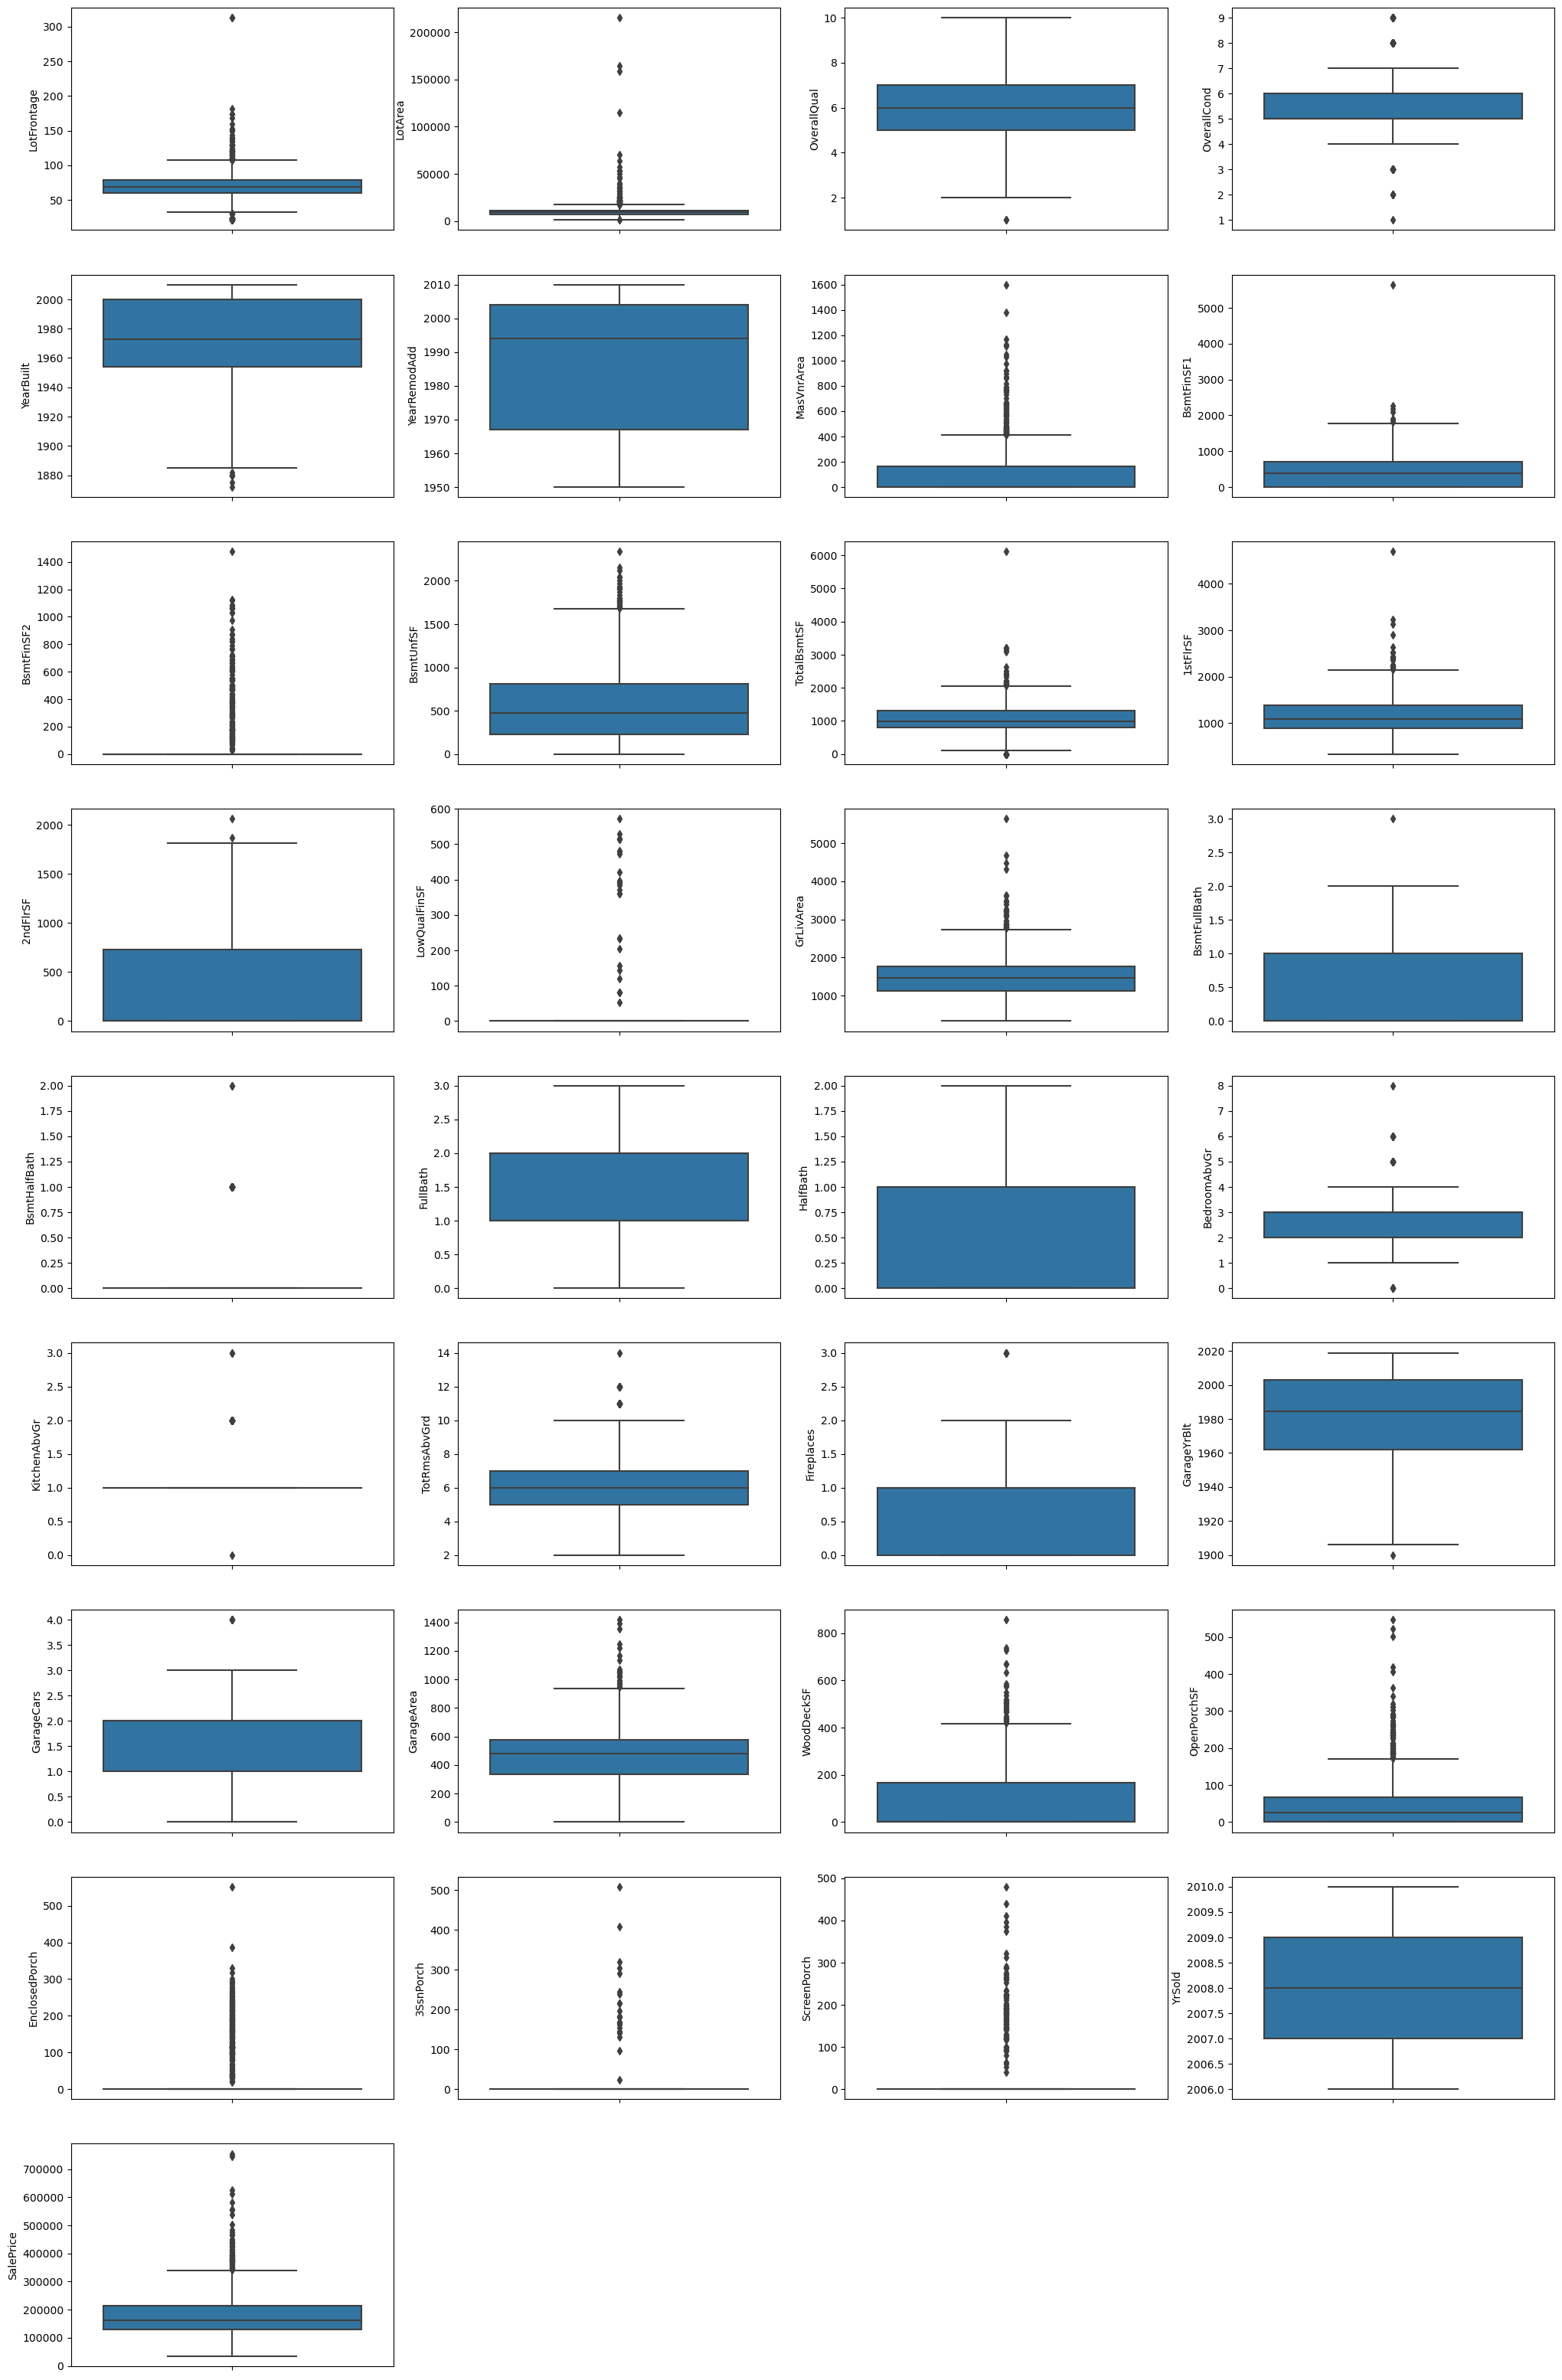

In [432]:
plt.figure(figsize=(25,40))
j=1
for i in num_col:
    plt.subplot(9,4,j)
    sns.boxplot(y=df[i])
    j+=1

In [433]:
#LotFrontage
q1 = df.LotFrontage.quantile(0.25)
q3 = df.LotFrontage.quantile(0.75)
IQR = q3 - q1
df = df[(df.LotFrontage >= q1 - 1.5*IQR) & (df.LotFrontage <= q3 + 1.5*IQR)]

In [434]:
#LotArea
q1 = df.LotArea.quantile(0.25)
q3 = df.LotArea.quantile(0.75)
IQR = q3 - q1
df = df[(df.LotArea >= q1 - 1.5*IQR) & (df.LotArea <= q3 + 1.5*IQR)]

In [435]:
#BsmtFinSF1
q1 = df.BsmtFinSF1.quantile(0.25)
q3 = df.BsmtFinSF1.quantile(0.75)
IQR = q3 - q1
df = df[(df.BsmtFinSF1 >= q1 - 1.5*IQR) & (df.BsmtFinSF1 <= q3 + 1.5*IQR)]

In [436]:
#TotalBsmtSF
q1 = df.TotalBsmtSF.quantile(0.25)
q3 = df.TotalBsmtSF.quantile(0.75)
IQR = q3 - q1
df = df[(df.TotalBsmtSF >= q1 - 1.5*IQR) & (df.TotalBsmtSF <= q3 + 1.5*IQR)]

In [437]:
df.shape

(1228, 75)

<Axes: >

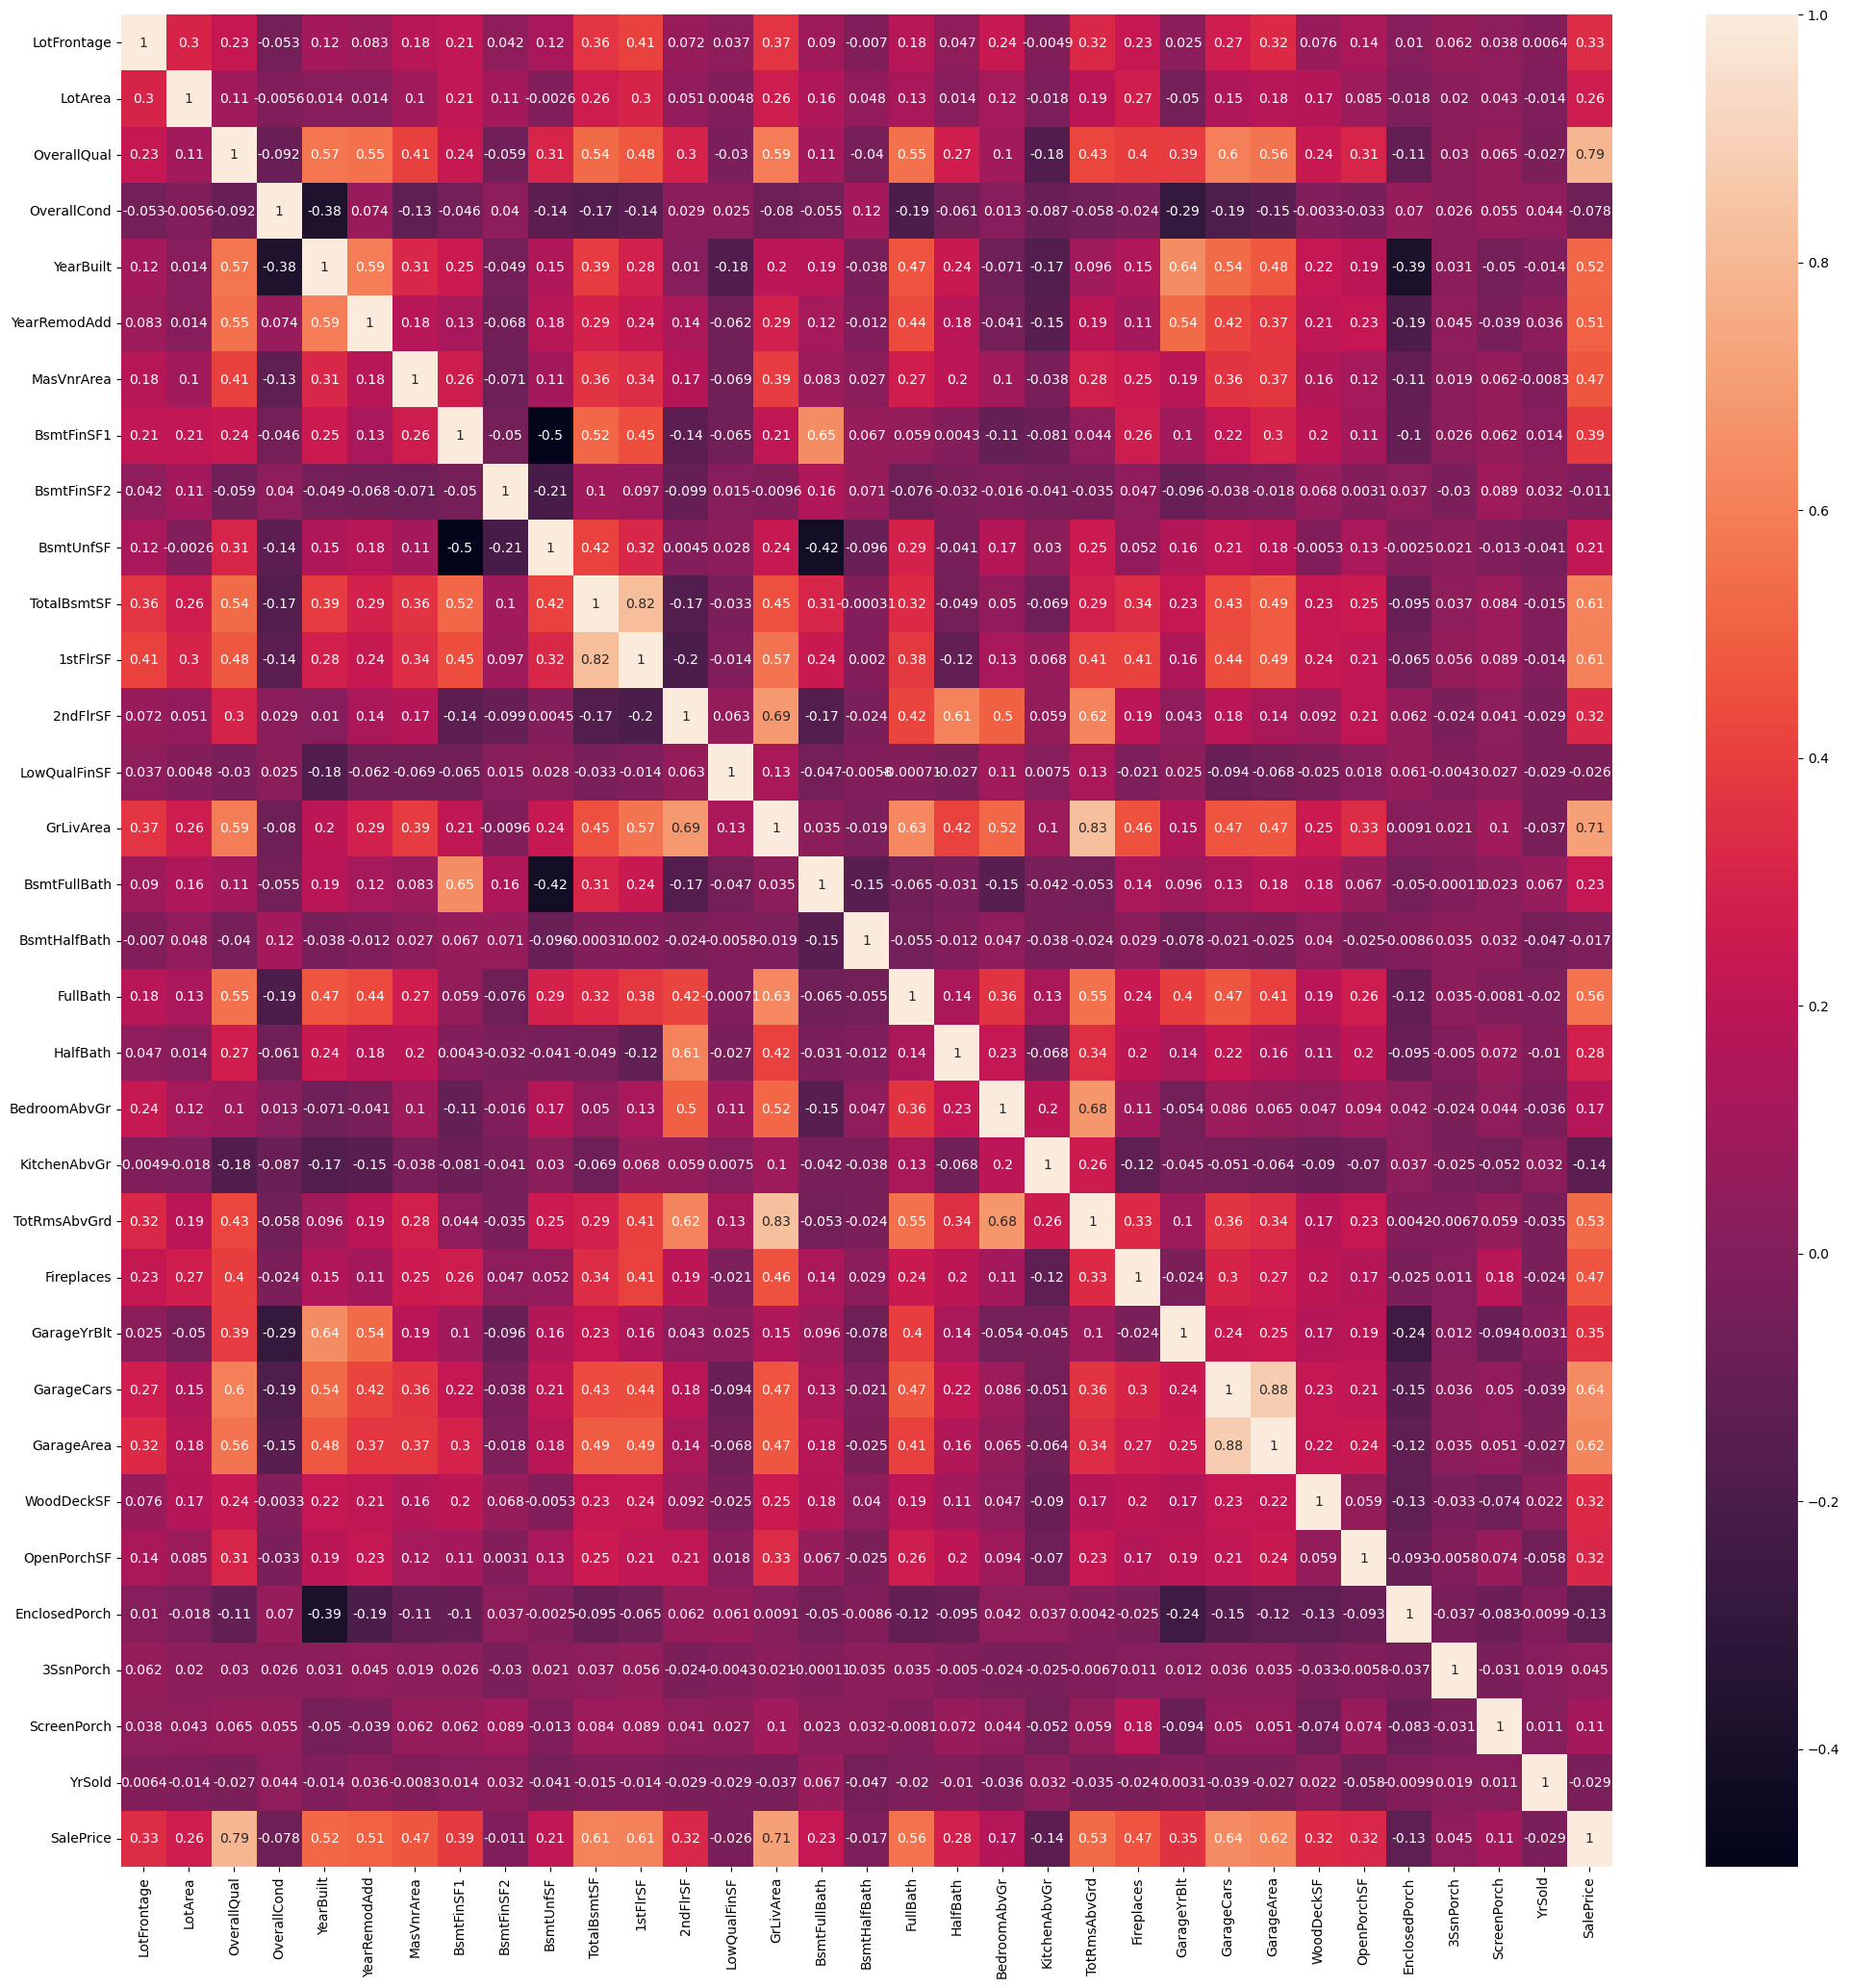

In [438]:
#PLotting heatmap and observing the correlation
plt.figure(figsize=(25,25))
sns.heatmap(num_col.corr(), annot=True)

### Preparing the data for modelling

In [439]:
#Categorical variables to dummy variables
df=pd.get_dummies(df, drop_first=True, dtype='uint8')
df.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,65.0,8450,7,5,2003,2003,196.0,706,0,150,...,0,0,0,0,1,0,0,0,1,0
1,80.0,9600,6,8,1976,1976,0.0,978,0,284,...,0,0,0,0,1,0,0,0,1,0
2,68.0,11250,7,5,2001,2002,162.0,486,0,434,...,0,0,0,0,1,0,0,0,1,0
3,60.0,9550,7,5,1915,1970,0.0,216,0,540,...,0,0,0,0,1,0,0,0,0,0
4,84.0,14260,8,5,2000,2000,350.0,655,0,490,...,0,0,0,0,1,0,0,0,1,0


In [440]:
# split into X and y
X = df.drop(['SalePrice'], axis=1)
y = df['SalePrice']

In [441]:
X.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,65.0,8450,7,5,2003,2003,196.0,706,0,150,...,0,0,0,0,1,0,0,0,1,0
1,80.0,9600,6,8,1976,1976,0.0,978,0,284,...,0,0,0,0,1,0,0,0,1,0
2,68.0,11250,7,5,2001,2002,162.0,486,0,434,...,0,0,0,0,1,0,0,0,1,0
3,60.0,9550,7,5,1915,1970,0.0,216,0,540,...,0,0,0,0,1,0,0,0,0,0
4,84.0,14260,8,5,2000,2000,350.0,655,0,490,...,0,0,0,0,1,0,0,0,1,0


In [442]:
y.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

In [584]:
X_train, X_test, y_train,y_test = train_test_split(X, y,train_size = 0.7,random_state =100)

In [585]:
X_train.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
1109,107.0,11362,8,5,2004,2005,42.0,1039,0,797,...,0,0,0,0,1,0,0,0,1,0
286,77.0,9786,6,7,1962,1981,0.0,600,0,312,...,0,0,0,0,1,0,0,0,1,0
720,69.0,6563,8,5,1985,1985,0.0,1148,0,594,...,0,0,0,0,1,0,0,0,1,0
262,88.0,8471,6,7,1977,1995,46.0,506,0,0,...,0,0,0,0,1,0,0,0,1,0
548,49.0,8235,5,7,1955,1995,0.0,180,645,0,...,0,0,0,0,1,0,0,0,1,0


##### It is important to have all the attributes in the same scale. So, Min-Max scaling needs to be done

In [586]:
X_train.select_dtypes(include=['int64','int32','float64','float32']).columns

Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'YrSold'],
      dtype='object')

In [587]:
num_col=['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'YrSold']

In [588]:
scaler=MinMaxScaler()
X_train[num_col]=scaler.fit_transform(X_train[num_col])
X_test[num_col]=scaler.fit_transform(X_test[num_col])

In [589]:
X_train.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
1109,1.000000,0.631484,0.777778,0.50,0.956522,0.916667,0.040115,0.631227,0.000000,0.413811,...,0,0,0,0,1,0,0,0,1,0
286,0.600000,0.522047,0.555556,0.75,0.652174,0.516667,0.000000,0.364520,0.000000,0.161994,...,0,0,0,0,1,0,0,0,1,0
720,0.493333,0.298243,0.777778,0.50,0.818841,0.583333,0.000000,0.697448,0.000000,0.308411,...,0,0,0,0,1,0,0,0,1,0
262,0.746667,0.430734,0.555556,0.75,0.760870,0.750000,0.043935,0.307412,0.000000,0.000000,...,0,0,0,0,1,0,0,0,1,0
548,0.226667,0.414346,0.444444,0.75,0.601449,0.750000,0.000000,0.109356,0.575893,0.000000,...,0,0,0,0,1,0,0,0,1,0


In [590]:
X_test.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
629,0.714286,0.456903,0.500,0.333333,0.664179,0.233333,0.161875,0.424490,0.227951,0.151023,...,0,0,0,0,1,0,0,0,1,0
843,0.685714,0.385424,0.375,0.166667,0.641791,0.183333,0.000000,0.000000,0.000000,0.943891,...,0,0,0,0,1,0,0,0,1,0
628,0.542857,0.638122,0.375,0.333333,0.701493,0.316667,0.120000,0.442177,0.000000,0.204510,...,0,0,0,0,1,0,0,1,0,0
745,0.528571,0.452908,0.750,1.000000,0.753731,0.766667,0.180625,0.391156,0.054274,0.255375,...,0,0,0,0,1,0,0,0,1,0
617,0.385714,0.331254,0.500,0.500000,0.589552,0.066667,0.000000,0.000000,0.000000,0.436287,...,0,0,0,0,1,0,0,0,1,0


In [591]:
#creating a Linear Regression object
lm=LinearRegression()

lm.fit(X_train,y_train)

LinearRegression()

In [592]:
#RFE
rfe = RFE(lm, n_features_to_select=25)             
rfe = rfe.fit(X_train, y_train)
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('LotFrontage', False, 132),
 ('LotArea', True, 1),
 ('OverallQual', True, 1),
 ('OverallCond', True, 1),
 ('YearBuilt', True, 1),
 ('YearRemodAdd', False, 65),
 ('MasVnrArea', False, 63),
 ('BsmtFinSF1', True, 1),
 ('BsmtFinSF2', False, 22),
 ('BsmtUnfSF', False, 21),
 ('TotalBsmtSF', True, 1),
 ('1stFlrSF', False, 14),
 ('2ndFlrSF', False, 2),
 ('LowQualFinSF', False, 18),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', False, 73),
 ('BsmtHalfBath', False, 124),
 ('FullBath', False, 125),
 ('HalfBath', False, 167),
 ('BedroomAbvGr', True, 1),
 ('KitchenAbvGr', True, 1),
 ('TotRmsAbvGrd', False, 26),
 ('Fireplaces', False, 130),
 ('GarageYrBlt', False, 200),
 ('GarageCars', False, 188),
 ('GarageArea', True, 1),
 ('WoodDeckSF', False, 74),
 ('OpenPorchSF', False, 79),
 ('EnclosedPorch', False, 149),
 ('3SsnPorch', False, 78),
 ('ScreenPorch', False, 67),
 ('YrSold', False, 217),
 ('MSSubClass_30', False, 100),
 ('MSSubClass_40', False, 192),
 ('MSSubClass_45', False, 170),
 ('MSSubClass_5

In [593]:
col=X_train.columns[rfe.support_]
col

Index(['LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'BsmtFinSF1',
       'TotalBsmtSF', 'GrLivArea', 'BedroomAbvGr', 'KitchenAbvGr',
       'GarageArea', 'MSSubClass_160', 'LotConfig_FR3', 'Neighborhood_Crawfor',
       'Neighborhood_StoneBr', 'HouseStyle_2.5Fin', 'ExterQual_Fa',
       'ExterQual_Gd', 'ExterQual_TA', 'Foundation_Wood', 'BsmtQual_Fa',
       'BsmtQual_Gd', 'BsmtQual_TA', 'BsmtExposure_No Basement',
       'Heating_OthW', 'SaleType_Con'],
      dtype='object')

In [594]:
X_train_rfe=X_train[col]
X_train_rfe.head()

,LotArea,OverallQual,OverallCond,YearBuilt,BsmtFinSF1,TotalBsmtSF,GrLivArea,BedroomAbvGr,KitchenAbvGr,GarageArea,...,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtExposure_No Basement,Heating_OthW,SaleType_Con
1109,0.631484,0.777778,0.50,0.956522,0.631227,0.934166,0.464606,0.500000,0.333333,0.819392,...,0,1,0,0,0,0,0,0,0,0
286,0.522047,0.555556,0.75,0.652174,0.364520,0.409762,0.430708,0.500000,0.333333,0.418251,...,0,0,1,0,0,0,1,0,0,0
720,0.298243,0.777778,0.50,0.818841,0.697448,0.880817,0.433367,0.333333,0.333333,0.536122,...,0,1,0,0,0,1,0,0,0,0
262,0.430734,0.555556,0.75,0.760870,0.307412,0.179342,0.257228,0.500000,0.333333,0.467681,...,0,0,1,0,0,1,0,0,0,0
548,0.414346,0.444444,0.75,0.601449,0.109356,0.360386,0.128614,0.333333,0.333333,0.684411,...,0,0,1,0,0,0,1,0,0,0


In [595]:
X_test_rfe=X_test[col]
X_test_rfe.head()

,LotArea,OverallQual,OverallCond,YearBuilt,BsmtFinSF1,TotalBsmtSF,GrLivArea,BedroomAbvGr,KitchenAbvGr,GarageArea,...,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtExposure_No Basement,Heating_OthW,SaleType_Con
629,0.456903,0.500,0.333333,0.664179,0.424490,0.598904,0.264124,0.375,0.0,0.486436,...,0,0,1,0,0,0,1,0,0,0
843,0.385424,0.375,0.166667,0.641791,0.000000,0.934875,0.426053,0.750,1.0,0.000000,...,0,0,1,0,0,0,1,0,0,0
628,0.638122,0.375,0.333333,0.701493,0.442177,0.472307,0.526808,0.625,0.0,0.471469,...,0,0,1,0,0,1,0,0,0,0
745,0.452908,0.750,1.000000,0.753731,0.391156,0.534388,0.755308,0.500,0.0,0.777362,...,0,0,0,0,0,0,1,0,0,0
617,0.331254,0.500,0.500000,0.589552,0.000000,0.345709,0.077726,0.250,0.0,0.493920,...,0,0,1,0,0,0,1,0,0,0


In [596]:
lm1=lm.fit(X_train_rfe, y_train)

In [597]:
# Print the coefficients and intercept
print(lm1.intercept_)
print(lm1.coef_)

60919.43994406727
[ 23194.35759925  80049.24879324  46089.61659422  64514.42196909
  24036.8074731   39471.03757049 184166.26881693 -28594.43373531
 -70836.35587301  30116.70421488 -28813.48062918  33309.28627594
  24049.74649654  29899.43991327 -38571.23153131 -46754.16722728
 -33307.58628793 -42138.52576082 -33446.57473223 -37193.28742417
 -42786.29101952 -43284.22878358 -22680.48632463 -34798.20815039
  44967.78334207]


In [598]:
#Predicting the values and getting the r2_score on the training set
y_train_pred = lm.predict(X_train_rfe)
r2_score(y_true=y_train, y_pred=y_train_pred)

0.9056727961432983

In [599]:
#Predicting the values and getting the r2_score on the test set
y_test_pred = lm.predict(X_test[col])
r2_score(y_true=y_test, y_pred=y_test_pred)

0.8146112385880078

In [600]:
mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr**0.5)

90969.43271909517


In [601]:
mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr**0.5)

89099.72413306145


##### We can see that the Mean square error is quite high and performance in test data is also not that great

### Ridge Regression

##### We have to find the right alpha value by substituting random values

In [602]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge=Ridge()
model=GridSearchCV(estimator=ridge, param_grid=params, scoring='neg_mean_absolute_error', cv=5, return_train_score=True, verbose=1)
model.fit(X_train_rfe, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [603]:
model.best_params_

{'alpha': 0.9}

In [604]:
model.best_score_

-15249.119280386532

##### Thus, we can proceed with the alpha value of 0.9

In [605]:
ridge=Ridge(alpha=0.9)
ridge.fit(X_train_rfe,y_train)
ridge.coef_

array([ 25026.57088898,  85343.86215876,  43867.62333749,  61147.59629471,
        25187.78991648,  40050.22413135, 162603.28896005, -17300.30522554,
       -54274.01126233,  33398.589032  , -23951.507816  ,  14470.91438224,
        25273.83681501,  28430.14427191, -26977.29976268, -39579.25683056,
       -30240.71320112, -40604.88208265, -15887.99624866, -36793.50179892,
       -42444.30165634, -44008.51393383, -11689.91193165, -21489.38602482,
        31996.62885973])

In [606]:
y_pred_train = ridge.predict(X_train_rfe)
y_pred_test = ridge.predict(X_test_rfe)

In [607]:
#R2 score of train
r2_score(y_true=y_train, y_pred=y_pred_train)

0.9041704261373944

In [608]:
#R2 score of test
r2_score(y_true=y_test, y_pred=y_pred_test)

0.8571814420323907

In [609]:
mse_train_ridge = mean_squared_error(y_train, y_pred_train)
print(mse_train_ridge**0.5)

20845.100122975415


In [610]:
mse_test_ridge = mean_squared_error(y_test, y_pred_test)
print(mse_test_ridge**0.5)

24538.519924989643


In [611]:
lasso=Lasso()
model=GridSearchCV(estimator=lasso, param_grid=params, scoring='neg_mean_absolute_error', cv=5, return_train_score=True, verbose=1)
model.fit(X_train_rfe, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [612]:
model.best_params_

{'alpha': 4.0}

##### Thus, we can proceed with the alpha value of 4

In [613]:
lasso=Lasso(alpha=4)
lasso.fit(X_train_rfe,y_train)
lasso.coef_

array([ 23125.5927298 ,  80610.48565189,  46005.94629603,  64536.51875967,
        24137.26571883,  39569.10453666, 183281.36623554, -27949.59665817,
       -69810.80980647,  30180.3793856 , -28140.02256641,  29108.5050697 ,
        24047.47479894,  29580.95142615, -37284.49877105, -45825.56866635,
       -32906.22602206, -41771.47143525, -29725.33522947, -36913.13424331,
       -42723.88600979, -43195.74139147, -19176.20784765, -32919.8940332 ,
        43278.13316861])

In [614]:
y_pred_train = lasso.predict(X_train_rfe)
y_pred_test = lasso.predict(X_test[col])

In [615]:
#R2 score of train
r2_score(y_true=y_train, y_pred=y_pred_train)

0.9056540221021654

In [616]:
#R2 score of test
r2_score(y_true=y_test, y_pred=y_pred_test)

0.8185965198175262

In [617]:
mse_train_lasso = mean_squared_error(y_train, y_pred_train)
print(mse_train_lasso**0.5)

20683.11287991369


In [618]:
mse_test_lasso = mean_squared_error(y_test, y_pred_test)
print(mse_test_lasso**0.5)

27655.33028470518


### Inference

##### **Linear regression**:
##### -> R2 score (train)= 0.9056727961432983
##### -> R2 score (test)= 0.8146112385880078
##### -> MSE (train)= 90969.43271909517
##### -> MSE(test) =  89099.72413306145


##### **Ridge regression**: (alpha=0.9)
##### -> R2 score (train)= 0.9041704261373944
##### -> R2 score (test)= 0.8571814420323907
##### -> MSE (train)= 20845.100122975415
##### -> MSE(test) = 24538.519924989643


##### **Lasso regression**: (alpha=4)
##### -> R2 score (train)= 0.9056540221021654
##### -> R2 score (test)= 0.8185965198175262
##### -> MSE (train)= 20683.11287991369
##### -> MSE(test) = 27655.33028470518

In [619]:
overall_coef=pd.DataFrame(index=X_train_rfe.columns)

In [620]:
overall_coef.rows=X_test_rfe.columns

In [621]:
overall_coef['Ridge']=ridge.coef_
overall_coef['Lasso']=lasso.coef_

In [622]:
overall_coef

,Ridge,Lasso
LotArea,25026.570889,23125.592730
OverallQual,85343.862159,80610.485652
OverallCond,43867.623337,46005.946296
YearBuilt,61147.596295,64536.518760
BsmtFinSF1,25187.789916,24137.265719
TotalBsmtSF,40050.224131,39569.104537
GrLivArea,162603.288960,183281.366236
BedroomAbvGr,-17300.305226,-27949.596658
KitchenAbvGr,-54274.011262,-69810.809806
GarageArea,33398.589032,30180.379386


##### These variables are significant in predicting the price of the house

#### Doubling the alpha value (prob statement ques 2)

In [637]:
ridge=Ridge(alpha=1.8)
ridge.fit(X_train_rfe,y_train)
ridge.coef_

array([ 26379.80782683,  86809.28393753,  41571.37060684,  58353.58358731,
        25967.7968053 ,  40473.49378343, 148063.73763294,  -9933.84761639,
       -44275.56835432,  35734.0087328 , -21116.72621763,   8559.57931192,
        25934.74408575,  27216.22115634, -20604.95895297, -35142.51482236,
       -28079.82306271, -39828.15973503, -10124.25457096, -36088.93040817,
       -41796.89880863, -44251.70282287,  -7863.34600045, -15100.54604617,
        25000.18078364])

In [638]:
y_pred_train = ridge.predict(X_train_rfe)
y_pred_test = ridge.predict(X_test_rfe)

In [639]:
#R2 score of train
r2_score(y_true=y_train, y_pred=y_pred_train)

0.9015620290882901

In [640]:
#R2 score of test
r2_score(y_true=y_test, y_pred=y_pred_test)

0.8717852394923903

In [641]:
mse_train_ridge = mean_squared_error(y_train, y_pred_train)
print(mse_train_ridge**0.5)

21126.888172610517


In [642]:
mse_test_ridge = mean_squared_error(y_test, y_pred_test)
print(mse_test_ridge**0.5)

23250.11230423958


In [643]:
lasso=Lasso(alpha=8)
lasso.fit(X_train_rfe,y_train)
lasso.coef_

array([ 23056.62843104,  81171.00003003,  45921.57790819,  64558.73231415,
        24237.83403135,  39667.04815624, 182396.64999492, -27304.54691261,
       -68785.53374619,  30244.29997038, -27466.79440045,  24907.74804513,
        24045.06746934,  29262.71665023, -35997.97070674, -44902.89406048,
       -32510.09092813, -41409.70379273, -26004.1876056 , -36629.89683405,
       -42658.62618308, -43104.42371887, -15671.95554714, -31041.54776636,
        41588.46378253])

In [644]:
y_pred_train = lasso.predict(X_train_rfe)
y_pred_test = lasso.predict(X_test_rfe)

In [645]:
#R2 score of train
r2_score(y_true=y_train, y_pred=y_pred_train)

0.9055977265931371

In [646]:
#R2 score of test
r2_score(y_true=y_test, y_pred=y_pred_test)

0.8224156189067956

In [647]:
mse_train_lasso = mean_squared_error(y_train, y_pred_train)
print(mse_train_lasso**0.5)

20689.282685736496


In [649]:
mse_test_lasso = mean_squared_error(y_test, y_pred_test)
print(mse_test_lasso**0.5)

27362.667006122334


##### Ques 3: Top 5 important variables

In [651]:
X_train_rfe.columns

Index(['LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'BsmtFinSF1',
       'TotalBsmtSF', 'GrLivArea', 'BedroomAbvGr', 'KitchenAbvGr',
       'GarageArea', 'MSSubClass_160', 'LotConfig_FR3', 'Neighborhood_Crawfor',
       'Neighborhood_StoneBr', 'HouseStyle_2.5Fin', 'ExterQual_Fa',
       'ExterQual_Gd', 'ExterQual_TA', 'Foundation_Wood', 'BsmtQual_Fa',
       'BsmtQual_Gd', 'BsmtQual_TA', 'BsmtExposure_No Basement',
       'Heating_OthW', 'SaleType_Con'],
      dtype='object')

In [653]:
X_train_new=X_train_rfe.drop(['LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'BsmtFinSF1'], axis=1)
X_test_new=X_test_rfe.drop(['LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'BsmtFinSF1'], axis=1)

##### Ridge regression

In [655]:
ridge=Ridge(alpha=0.9)
ridge.fit(X_train_new,y_train)
ridge.coef_

array([ 64811.20500994, 179546.92816001, -15451.12420932, -99168.62395565,
        61567.24911994, -30911.12903795,  17309.5120933 ,  28482.32584691,
        34656.13882836, -50264.82767117, -79306.75213549, -39354.67301285,
       -58467.97903475, -11542.31184968, -74646.34772335, -47832.10145681,
       -65804.87127303,  -8365.8582856 , -37621.62372524,  42456.36065179])

In [656]:
y_pred_train = ridge.predict(X_train_new)
y_pred_test = ridge.predict(X_test_new)

In [657]:
#R2 score of train
r2_score(y_true=y_train, y_pred=y_pred_train)

0.8597385650856052

In [658]:
#R2 score of test
r2_score(y_true=y_test, y_pred=y_pred_test)

0.5857071350541163

In [659]:
mse_train_ridge = mean_squared_error(y_train, y_pred_train)
print(mse_train_ridge**0.5)

25218.73776933391


In [660]:
mse_test_ridge = mean_squared_error(y_test, y_pred_test)
print(mse_test_ridge**0.5)

41793.59878095001


##### Lasso regression

In [661]:
lasso=Lasso(alpha=4)
lasso.fit(X_train_new,y_train)
lasso.coef_

array([  63250.86963319,  199780.29512776,  -25870.14089145,
       -124138.66315356,   57850.3931445 ,  -35163.25261323,
         34974.9781279 ,   26458.90505241,   35531.64998273,
        -69159.31129469,  -92171.53104109,  -43875.88078783,
        -61371.17455592,  -21708.30607126,  -75646.16804508,
        -47945.73010617,  -64821.27608561,  -13263.12620586,
        -59016.3341331 ,   57968.33644593])

In [662]:
y_pred_train = lasso.predict(X_train_new)
y_pred_test = lasso.predict(X_test_new)

In [663]:
#R2 score of train
r2_score(y_true=y_train, y_pred=y_pred_train)

0.8622630948930139

In [664]:
#R2 score of test
r2_score(y_true=y_test, y_pred=y_pred_test)

0.41304284050931905

In [665]:
mse_train_lasso = mean_squared_error(y_train, y_pred_train)
print(mse_train_lasso**0.5)

24990.75444205498


In [666]:
mse_test_lasso = mean_squared_error(y_test, y_pred_test)
print(mse_test_lasso**0.5)

49746.12358194382


##### The score are reduced a lot now

In [667]:
X_train_new.columns

Index(['TotalBsmtSF', 'GrLivArea', 'BedroomAbvGr', 'KitchenAbvGr',
       'GarageArea', 'MSSubClass_160', 'LotConfig_FR3', 'Neighborhood_Crawfor',
       'Neighborhood_StoneBr', 'HouseStyle_2.5Fin', 'ExterQual_Fa',
       'ExterQual_Gd', 'ExterQual_TA', 'Foundation_Wood', 'BsmtQual_Fa',
       'BsmtQual_Gd', 'BsmtQual_TA', 'BsmtExposure_No Basement',
       'Heating_OthW', 'SaleType_Con'],
      dtype='object')

In [668]:
ridge.coef_

array([ 64811.20500994, 179546.92816001, -15451.12420932, -99168.62395565,
        61567.24911994, -30911.12903795,  17309.5120933 ,  28482.32584691,
        34656.13882836, -50264.82767117, -79306.75213549, -39354.67301285,
       -58467.97903475, -11542.31184968, -74646.34772335, -47832.10145681,
       -65804.87127303,  -8365.8582856 , -37621.62372524,  42456.36065179])

##### Top 5- 'GrLivArea', 'KitchenAbvGr', 'ExterQual_Fa', 'BsmtQual_Fa', 'BsmtQual_TA'